# Import des outils / jeu de données

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

import os

In [10]:
os.getcwd()

'c:\\Users\\jules\\Desktop\\Cours\\DataScience\\analyse-survie\\src'

In [11]:
np.random.seed(0)
sns.set_theme()

In [12]:
df = pd.read_csv(
    "../data/kickst"
    "arter_1.csv",
    parse_dates=True,
)

# Kaplan-Meier

<Axes: xlabel='day_succ', ylabel='Count'>

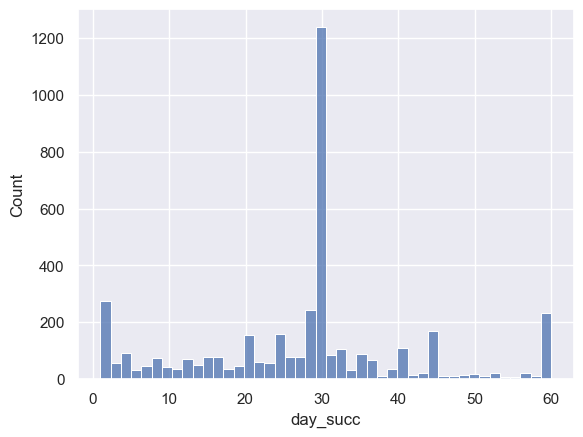

In [13]:
sns.histplot(df["day_succ"])

In [32]:
kmf = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf.fit(event_times, event_observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4175 total observations, 2213 right-censored observations>

Text(0, 0.5, 'Probabilité')

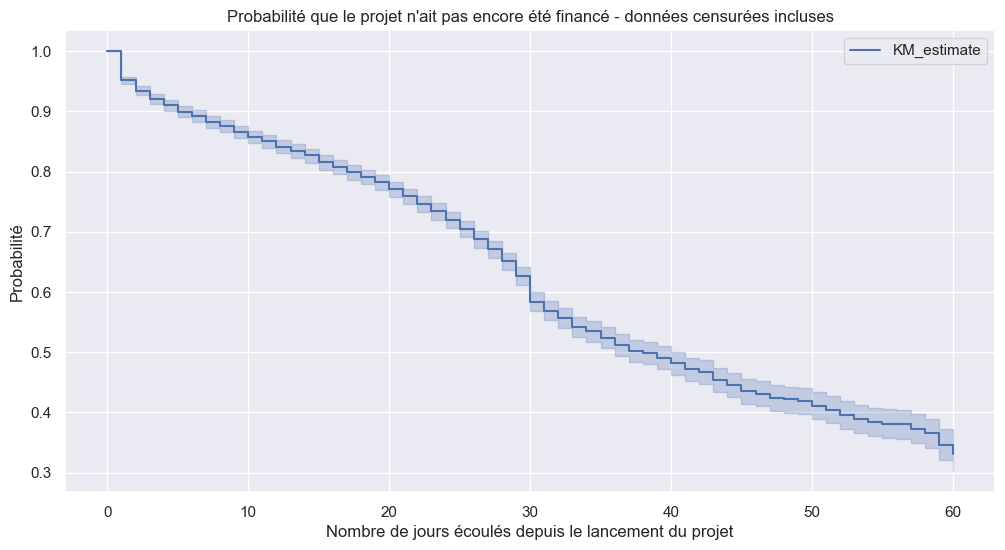

In [37]:
plt.figure(figsize=(12, 6))
kmf.plot()
plt.title("Probabilité que le projet n'ait pas encore été financé - données censurées incluses")
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

In [39]:
event_times = df["day_succ"][df["Status"] == 1]
event_observed = df["Status"][df["Status"] == 1]

kmf.fit(event_times, event_observed)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1962 total observations, 0 right-censored observations>

Text(0, 0.5, 'Probabilité')

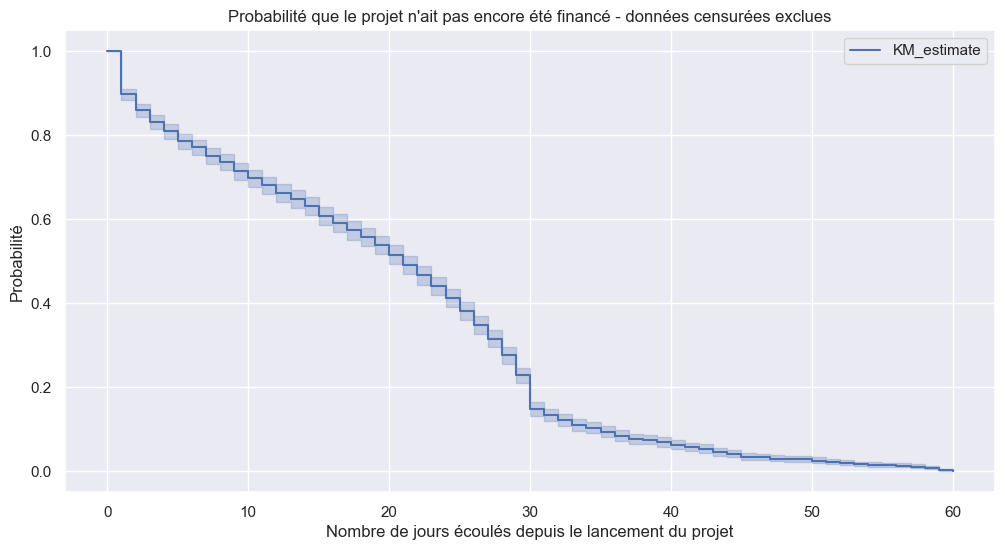

In [40]:
plt.figure(figsize=(12, 6))
kmf.plot()
plt.title("Probabilité que le projet n'ait pas encore été financé - données censurées exclues")
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

# Kaplan Meier par classe

In [22]:
df_video = df[df["has_video"] == 1].copy()
df_no_video = df[df["has_video"] == 0].copy()

Text(0, 0.5, 'Probabilité')

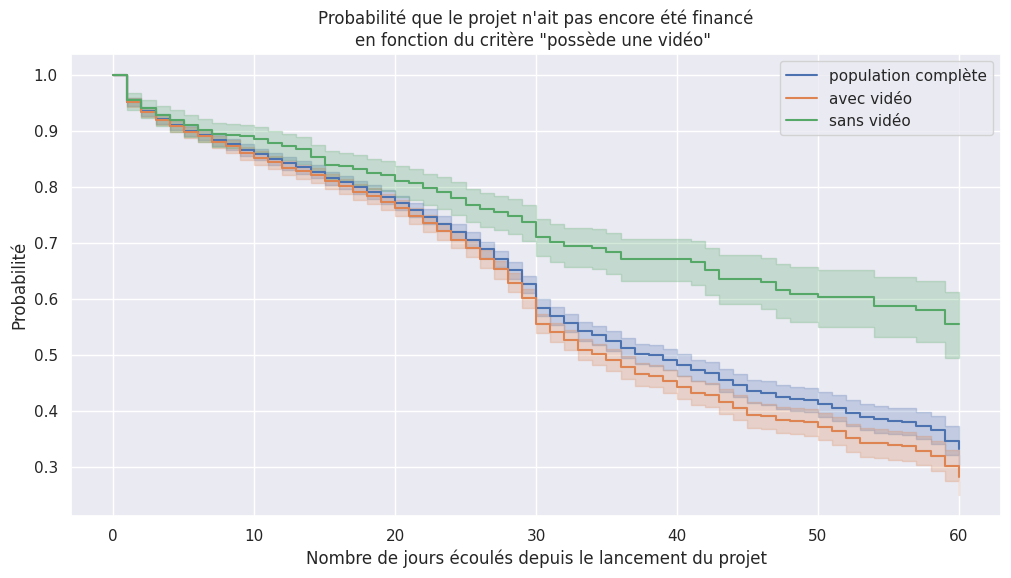

In [52]:
plt.figure(figsize=(12, 6))
kmf = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf.fit(event_times, event_observed)
kmf.plot_survival_function(label="population complète")


event_times = df_video["day_succ"]
event_observed = df_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="avec vidéo")


event_times = df_no_video["day_succ"]
event_observed = df_no_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="sans vidéo")

plt.title("""Probabilité que le projet n'ait pas encore été financé\nen fonction du critère "possède une vidéo" """)


plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")